In [1]:
# @title HW 1
# @markdown Student Info
# @markdown Name: [Skyler Thomas]
# @markdown JHED-ID: [sthom215]

# @markdown Load up the calcium image video in the file: TEST MOVIE 00001-small-motion.tif. This file represents the raw fluorescence video in TIF format, common for calcium imaging.

import os
from pathlib import Path
home = Path.cwd()

# Problem 3: Drawing Regions Of Interest (ROIs) 

Given the summary images, the next step is to draw ROIs around the image to isolate the pixels belonging to a specific cell.

## Part A: 

* Write a short script that takes in a summary image and potentially other information (i.e., a seed pixel selected by the user), and outputs a binary mask over an ROI. 

* Find 5 different ROIs in the data provided.

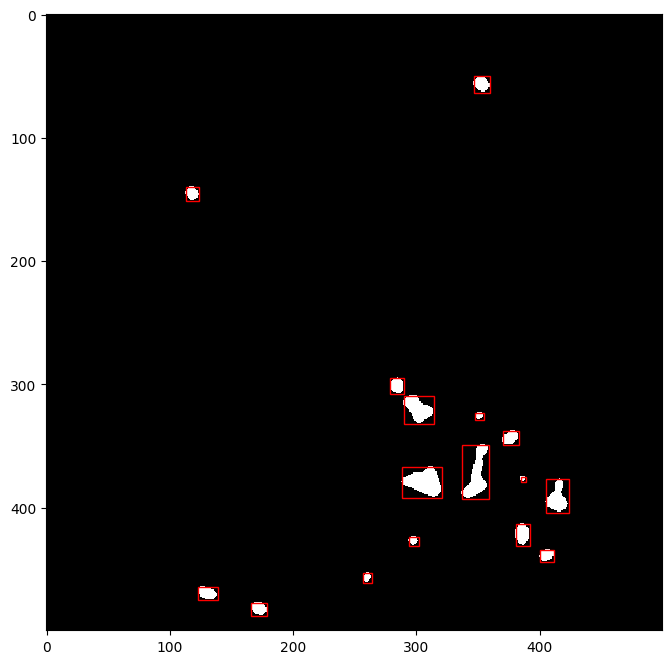

In [2]:
# @markdown Load the video file using the provided TIFF_IO class.
from sthom215_problem_2_ex_1 import SummaryImages
from sthom215_problem_3_ex_1 import get_roi_2, get_bounding_boxes
fname = 'TEST_MOVIE_00001-small.tif'
summaryimage = SummaryImages(home/fname)
summaryimage = summaryimage.get_mean()
sigma = 3; kernel = 7
ROIs = get_roi_2(summaryimage, sigma, kernel)
rois_bounding_boxes = get_bounding_boxes(ROIs, True)  